In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6543,8050-XGRVL,Female,0,Yes,Yes,62,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Credit card (automatic),54.75,3425.35,No
4652,3178-CIFOT,Female,0,No,No,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),19.65,478.1,No
821,5318-YKDPV,Male,0,Yes,Yes,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.15,3566.6,No
6145,5010-IPEAQ,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,No
2624,0820-FNRNX,Male,0,Yes,Yes,17,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,66.70,1077.05,No


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

In [7]:
# drop unnecessary column
df.drop("customerID", axis="columns", inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [15]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## Data Visualization

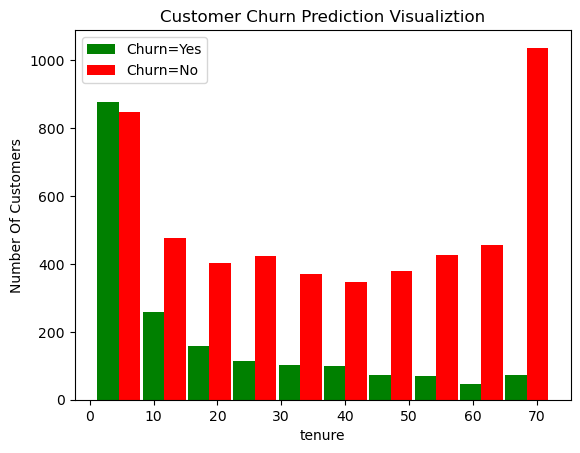

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

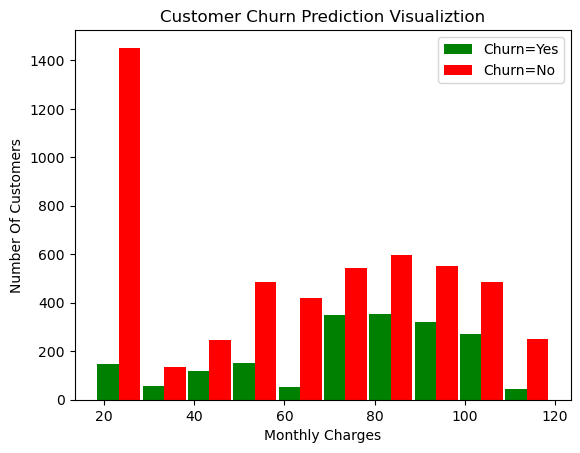

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
                

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [29]:
df1.gender.unique()

array([1, 0])

In [30]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Train Test Split

In [33]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [34]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [35]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [36]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
len(X_train.columns)

26

## Build a model (ANN) in tensorflow/keras

In [43]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.4 MB/s eta 0:00:0000:0100:01


In [44]:
from tensorflow_addons import losses

In [45]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Metal device set to: Apple M1


2023-01-20 09:12:58.192570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-20 09:12:58.192837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-01-20 09:12:58.695390: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-20 09:12:58.861878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 2s 6ms/step - loss: 0.4895 - accuracy: 0.7570
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4289 - accuracy: 0.7888
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4221 - accuracy: 0.7956
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4186 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4162 - accuracy: 0.8007
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8032
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4137 - accuracy: 0.8021
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4123 - accuracy: 0.8027
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4107 - accuracy: 0.8050
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4100 - accuracy: 0.8039
E

2023-01-20 09:14:40.332388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 5ms/step - loss: 0.4857 - accuracy: 0.7854
[0.48569804430007935, 0.7853589653968811]
44/44 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1033
         1.0       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



2023-01-20 09:14:40.626240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Mitigating Skewdness of Data

## Method 1: Undersampling

In [48]:
# Class Count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2["Churn"] == 0]
df_class_1 = df2[df2["Churn"] == 1]

In [49]:
# Undersample 0-class and concat the DataFrames of both classes
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print("Random under-sampling:")
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [53]:
X = df_test_under.drop("Churn", axis="columns")
y = df_test_under["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
 9/94 [=>............................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5139 

2023-01-20 09:23:12.174189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 9ms/step - loss: 0.6442 - accuracy: 0.6415
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5324 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5033 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4935 - accuracy: 0.7686
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4894 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4851 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4818 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4807 - accuracy: 0.7696
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4766 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4763 - accuracy: 0.7739
Epoch 11/100
94/94 [=

2023-01-20 09:24:08.048404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 9ms/step - loss: 0.5566 - accuracy: 0.7233
[0.556574285030365, 0.7232620716094971]
24/24 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       374
           1       0.72      0.72      0.72       374

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.72      0.72      0.72       748



2023-01-20 09:24:08.340498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Method 2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print("Random over-sampling:")
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [57]:
X = df_test_over.drop("Churn", axis="columns")
y = df_test_over["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
  9/259 [>.............................] - ETA: 1s - loss: 0.6987 - accuracy: 0.5000  

2023-01-20 09:29:20.491646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 2s 7ms/step - loss: 0.5594 - accuracy: 0.7229
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4918 - accuracy: 0.7623
Epoch 3/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4824 - accuracy: 0.7672
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4792 - accuracy: 0.7673
Epoch 5/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4748 - accuracy: 0.7686
Epoch 6/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4713 - accuracy: 0.7736
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4684 - accuracy: 0.7738
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4667 - accuracy: 0.7752
Epoch 9/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4643 - accuracy: 0.7771
Epoch 10/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4618 - accuracy: 0.7816
E

2023-01-20 09:31:49.711621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.7875
[0.4651833474636078, 0.7875121235847473]
65/65 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1033
           1       0.78      0.80      0.79      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



2023-01-20 09:31:50.069526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# Method 3: SMOTE

In [60]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 3.8 MB/s eta 0:00:00a 0:00:01


In [67]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

# Method 4: Use of Ensemble with undersampling

In [69]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
# Regain Original features and labels
X = df2.drop("Churn", axis="columns")
y = df2["Churn"]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [72]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

#### model1 --> class1(1495) + class0(0,1495)
#### model2 --> class1(1495) + class0(1496,2990)
#### model3 --> class1(1495) + class0(2990,4130)

In [74]:
df3 = X_train.copy()
df3["Churn"] = y_train

In [75]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [76]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [77]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train = df_train.drop("Churn", axis="columns")
    y_train = df_train.Churn
    return X_train, y_train

In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
 8/94 [=>............................] - ETA: 0s - loss: 0.7002 - accuracy: 0.4961 

2023-01-20 09:46:11.539069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 7ms/step - loss: 0.6380 - accuracy: 0.6525
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5242 - accuracy: 0.7505
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4964 - accuracy: 0.7662
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.7712
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4843 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4830 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4792 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4778 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4779 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4750 - accuracy: 0.7689
Epoch 11/100
94/94 [=

2023-01-20 09:47:07.990536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 5ms/step - loss: 0.5714 - accuracy: 0.7249
[0.5713969469070435, 0.7249467372894287]
44/44 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.76      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.78      0.72      0.74      1407



2023-01-20 09:47:08.299038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [79]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
 7/94 [=>............................] - ETA: 0s - loss: 0.7074 - accuracy: 0.4330 

2023-01-20 09:47:08.580961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 7ms/step - loss: 0.6384 - accuracy: 0.6572
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5231 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4987 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4900 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4842 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4813 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4765 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4744 - accuracy: 0.7676
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4712 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4717 - accuracy: 0.7692
Epoch 11/100
94/94 [=

2023-01-20 09:48:03.917530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 5ms/step - loss: 0.6198 - accuracy: 0.7050
[0.6197667717933655, 0.7050462365150452]
44/44 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.76      0.58       374

    accuracy                           0.71      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.78      0.71      0.72      1407



2023-01-20 09:48:04.211870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [80]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
 7/83 [=>............................] - ETA: 0s - loss: 0.6862 - accuracy: 0.5357 

2023-01-20 09:48:04.490548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 1s 10ms/step - loss: 0.6401 - accuracy: 0.6315
Epoch 2/100
83/83 [==============================] - 0s 6ms/step - loss: 0.5339 - accuracy: 0.7560
Epoch 3/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4976 - accuracy: 0.7681
Epoch 4/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4863 - accuracy: 0.7662
Epoch 5/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4801 - accuracy: 0.7693
Epoch 6/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.7753
Epoch 7/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4735 - accuracy: 0.7772
Epoch 8/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.7765
Epoch 9/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4672 - accuracy: 0.7822
Epoch 10/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4643 - accuracy: 0.7829
Epoch 11/100
83/83 [

2023-01-20 09:48:53.331973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 5ms/step - loss: 0.6346 - accuracy: 0.6823
[0.6346449851989746, 0.6823027729988098]
44/44 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.64      0.75      1033
           1       0.44      0.79      0.57       374

    accuracy                           0.68      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.77      0.68      0.70      1407



2023-01-20 09:48:53.640859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [81]:
len(y_pred1)

1407

In [82]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [83]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407

